In [1]:
from github import Github
g=Github("priyanshu2411","priyanshu.krishnan")

In [2]:
for repo in g.get_user().get_repos():
#     print(repo.downloads_url)
    print(repo.html_url)
    

https://github.com/BewakoofData/311-nyc-data-
https://github.com/BewakoofData/awesome-courses
https://github.com/BewakoofData/awesome-courses-1
https://github.com/BewakoofData/awesome-datascience
https://github.com/BewakoofData/awesome-deep-learning
https://github.com/BewakoofData/Awesome-Hacking
https://github.com/BewakoofData/awesome-hadoop
https://github.com/BewakoofData/awesome-java
https://github.com/BewakoofData/awesome-machine-learning
https://github.com/BewakoofData/awesome-R
https://github.com/BewakoofData/awesome-rnn
https://github.com/BewakoofData/Blockchain-stuff
https://github.com/BewakoofData/caffe
https://github.com/BewakoofData/computer-science
https://github.com/BewakoofData/data-science
https://github.com/BewakoofData/Data-Science-45min-Intros
https://github.com/BewakoofData/DataScienceR
https://github.com/BewakoofData/DataScienceResources
https://github.com/BewakoofData/deeppy
https://github.com/BewakoofData/free-data-science-books
https://github.com/BewakoofData/fre

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import networkx as nx
import algorithms as al
titanic = sb.load_dataset('titanic')

In [4]:
from algorithms.sorting import bubble_sort as bu #pip install algorithms

In [5]:
bu.sort([2,3,4,5,2,1,2,9,8,5]) #playing with algorithms package

[1, 2, 2, 2, 3, 4, 5, 5, 8, 9]

In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
titanic.groupby('sex').mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


In [8]:
titanic.groupby('sex')[['survived','age']].mean()

,survived,age
sex,,
female,0.742038,27.915709
male,0.188908,30.726645


In [9]:
titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [10]:
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [11]:
age = pd.cut(titanic['age'],[0,18,30,50,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 30]  0.958333  0.900000  0.500000
       (30, 50]  0.972973  0.925926  0.272727
       (50, 80]  1.000000  0.666667  1.000000
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 30]  0.428571  0.027027  0.147541
       (30, 50]  0.448980  0.114286  0.126761
       (50, 80]  0.192308  0.083333  0.000000

In [12]:
fare = pd.qcut(titanic['fare'],2)
titanic.pivot_table('survived',['sex',age],[fare,'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 30]              NaN  0.916667  0.500000          0.958333   
       (30, 50]              NaN  0.916667  0.142857          0.972973   
       (50, 80]              NaN  0.000000  1.000000          1.000000   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 30]              NaN  0.040000  0.138889          0.428571   
       (30, 50]              0.0  0.176471  0.118644          0.488889   
       (50, 80]              NaN  0.111111  0.000000          0.192308   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 30]  0.888889  0.500000  
       (30, 50]  0.933333  0.333333  
       (50, 80]  1.000000       NaN  
male   (0, 18]   0.818182  0.178571  
       (18, 30]  0.000000  0.214286  
       (30, 50]  0.055556  0.166667  
       (50, 80]  0.000000       NaN

In [13]:
titanic.pivot_table(index='sex',columns='class',aggfunc= {'survived':sum,'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [14]:
titanic.pivot_table('survived',index='sex',columns='class',margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [15]:
birth = pd.read_csv('./data_csv/birth.csv')

In [16]:
birth.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [17]:
birth.isnull().any()

year      False
month     False
day        True
gender    False
births    False
dtype: bool

In [18]:
birth['decade']=10*(birth['year']//10)

In [21]:
birth.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [24]:
x=birth.pivot_table('births',index='decade',columns='gender')
x

gender,F,M
decade,,
1960,4566.755208,4808.781250
1970,4267.403569,4497.386393
1980,5460.886072,5740.886635
1990,162328.783333,170171.275000
2000,168789.898148,176911.370370


Text(0,0.5,'total birhts per year')

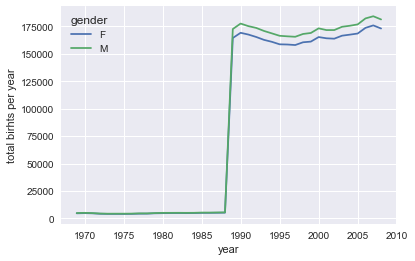

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
sb.set()
birth.pivot_table('births',index='year',columns='gender').plot()
plt.ylabel('total birhts per year')

In [45]:
birth['day'].isnull().any()

True

In [52]:
birth['day']=birth['day'].fillna(0)
birth['day']=birth['day'].astype(int)

In [53]:
birth.index=pd.to_datetime(10000*birth.year+100*birth.month+birth.day,format='%Y%m%d')

TypeError: 'int' object is unsliceable

In [54]:
birth['dayofweek']=birth.index.dayofweek

AttributeError: 'RangeIndex' object has no attribute 'dayofweek'

In [55]:
x=np.array([2,3,5,7,11,13])

In [56]:
x*2

array([ 4,  6, 10, 14, 22, 26])

In [57]:
data=['niti','PRACK','Martin','gULOIO']
[s.capitalize() for s in data]

['Niti', 'Prack', 'Martin', 'Guloio']

In [58]:
data=['niti','PRACK',None,'Martin','gULOIO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [59]:
names= pd.Series(data)

In [60]:
names

0      niti
1     PRACK
2      None
3    Martin
4    gULOIO
dtype: object

In [61]:
names.str.capitalize()

0      Niti
1     Prack
2      None
3    Martin
4    Guloio
dtype: object

In [62]:
names.str.len()

0    4.0
1    5.0
2    NaN
3    6.0
4    6.0
dtype: float64

In [69]:
names.str.center(2,fillchar='$')

0      niti
1     PRACK
2      None
3    Martin
4    gULOIO
dtype: object

In [72]:
names.str.startswith('T')

0    False
1    False
2     None
3    False
4    False
dtype: object

In [73]:
names.str.split('t')

0      [ni, i]
1      [PRACK]
2         None
3    [Mar, in]
4     [gULOIO]
dtype: object

In [74]:
import re

In [ ]:
names.str.extract()

In [28]:
import os #playing with operating system package

In [33]:
os.system('dir')

0

In [36]:
os.getcwd()

'C:\\Users\\priyanshu\\Desktop\\practice'

In [39]:
os.getpid()

5624

In [42]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'data_csv',
 'day 1 practice.ipynb',
 'day 2 practise.ipynb',
 'day 3 practise.ipynb',
 'day 4 practise.ipynb',
 'day 5 practise.ipynb',
 'master',
 '_config.yml']

In [1]:
class Stack:
    stack_list = []

    def __init__(self):
        self.stack_list = []

    def add(self, value):
       
        self.stack_list.append(value)

    def remove(self):
        
        return self.stack_list.pop()

    def is_empty(self):
        
        return not len(self.stack_list)

    def size(self):
        
        return len(self.stack_list)


In [3]:
a=Stack()

In [5]:
a.add(10)

In [6]:
a.add(10)

In [10]:
a.remove()

10

In [11]:
a.size()

1

In [12]:
a.add(20)

In [13]:
a.add(30)

In [15]:
a.stack_list

[10, 20, 30]

In [16]:
a.remove()

30

In [17]:
from algorithms.data_structures import queue

In [19]:
a=queue

In [20]:
#lets practice 


In [22]:
import pandas as pd
name = pd.Series(['Graham Champman','John Cleese','Terry Gilliam','Eric Idle','Terry Jones','Michael Palin'])

In [31]:
name.str.extract('([A-Za-z]+.*)')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


0    Graham Champman
1        John Cleese
2      Terry Gilliam
3          Eric Idle
4        Terry Jones
5      Michael Palin
dtype: object

In [32]:
name.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Champman]
1                   []
2      [Terry Gilliam]
3                   []
4        [Terry Jones]
5      [Michael Palin]
dtype: object

In [33]:
name.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [34]:
name.str.split().str.get(-1)

0    Champman
1      Cleese
2     Gilliam
3        Idle
4       Jones
5       Palin
dtype: object

In [35]:
full_mo =pd.DataFrame({'name':name,'info':['B|C|D','B|D','A|C','B|D','B|C','B|C|D']})
full_mo

,info,name
0,B|C|D,Graham Champman
1,B|D,John Cleese
2,A|C,Terry Gilliam
3,B|D,Eric Idle
4,B|C,Terry Jones
5,B|C|D,Michael Palin


In [36]:
full_mo['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


In [37]:
!curl -O http://openrecipes.s3.amazonaws.com/recipeitems-latest.json.gz
!gunzip recipeitems-latest.json.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    20  100    20    0     0     27      0 --:--:-- --:--:-- --:--:--    35
'gunzip' is not recognized as an internal or external command,
operable program or batch file.


In [38]:
try:
    recipes = pd.read_json('recipeitems-latest.json')
except ValueError as e:
    print('ValueError:',e)

ValueError: Expected object or value


In [39]:
with open('recipetitems-latest.json') as f:
    line = f.readline()
pd.read_json(line).shape

FileNotFoundError: [Errno 2] No such file or directory: 'recipetitems-latest.json'

In [40]:
# read the entire file into a Python array
with open('recipeitems-latest.json', 'r') as f:
    # Extract each line
    data = (line.strip() for line in f)
    # Reformat so each line is the element of a list
    data_json = "[{0}]".format(','.join(data))
# read the result as a JSON
recipes = pd.read_json(data_json)

FileNotFoundError: [Errno 2] No such file or directory: 'recipeitems-latest.json'